# Исходные данные

Данные, с которыми проводится работа - таблица формата CSV.

 В таблице присутствует следующая информация:
 - children — количество детей в семье
 - days_employed — общий трудовой стаж в днях
 - dob_years — возраст клиента в годах
 - education — уровень образования клиента
 - education_id — идентификатор уровня образования
 - family_status — семейное положение
 - family_status_id — идентификатор семейного положения
 - gender — пол клиента
 - income_type — тип занятости
 - debt — имел ли задолженность по возврату кредитов
 - total_income — ежемесячный доход
 - purpose — цель получения кредита       

# Задачи исследования

Есть ли зависимость между возвратом кредита в срок и:
 - количеством детей
 - семейным положением 
 - уровнем дохода 
 - целью кредита 

# Ход исследования

## Обзор данных

In [1]:
# импорт библиотек

import pandas as pd
import seaborn
import matplotlib.pylab as plt

In [2]:
data = pd.read_csv('data.csv')

display(data.head(10))

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


<div class="alert alert-info">

Необходима работа над пропусками, аномальными значениями стажа (отрицательными), а также привод значений в колонке образование к единому регистру для дальшейшей работы.
    
Для проведения исследования также объединим уровень доходов и цель кредита в категории.


## Предобработка данных

###  Пропуски и аномальные значения

In [4]:
# общее количество пропусков
print(data.isna().sum())

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64


In [5]:
# работа с пропусками в total_income - замена медианными значениями исходя из типа занятости

for a in data['income_type'].unique():
    # Сотрируем датасет, тип занятости-(а) и доход пропущен
    # Заполняем отсортированные строки медианой дохода по необходимому типу занятости
    data.loc[(data['income_type'] == a) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[data['income_type'] == a, 'total_income'].median()

# повторная проверка пропусков
data['total_income'].isna().sum()  

0

In [ ]:
# Замена вещественного типа данных в столбце total_income на целочисленный
data['total_income'] = data['total_income'].astype('int')

In [6]:
#провека значений колонки days_employed
print(data['days_employed'].unique())

[-8437.67302776 -4024.80375385 -5623.42261023 ... -2113.3468877
 -3112.4817052  -1984.50758853]


In [7]:
# обработка аномальных значений - минусовых дней стажа (превращаем в положительные числа модулем)
data['days_employed'] = data['days_employed'].abs()

In [8]:
# медианное значение трудового стажа для каждого типа занятости
median = data.groupby('income_type')['days_employed'].median()
print(median)

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64


In [11]:
# работа с пропусками в days_employed - замена медианными значениями исходя из типа занятости
for b in data['income_type'].unique():
    # Сотрируем датасет - где тип занятости -(b) и количество рабочих дней пропущено
    # Заполняем отсортированные строки медианой дней по необходимому типу занятости
    data.loc[(data['income_type'] == b)&(data['days_employed'].isna()), 'days_employed'] = \
    data.loc[data['income_type'] == b, 'days_employed'].median()

In [9]:
# перечень уникальных значений столбца children
print(data['children'].unique())

[ 1  0  3  2 -1  4 20  5]


In [10]:
# удаляем строки с аномальными значениями
# index - указывает, что необхоимо удалить строки
data = data.drop(data.loc[(data['children'] == 20) | (data['children'] == -1)].index)
print(data['children'].unique())

[1 0 3 2 4 5]


In [12]:
# проверяем остались ли пропуски в датасете
print(data.isna().sum())

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64


### Дубликаты 

In [14]:
# в колонке строчные и прописные буквы - приводим все к нижнему регистру
data['education'] = data['education'].str.lower()
print(data['education'].unique())

['высшее' 'среднее' 'неоконченное высшее' 'начальное' 'ученая степень']


In [15]:
# проверка остальных столбцов
print(data['family_status'].unique())
print(data['gender'].unique())
print(data['income_type'].unique())
print(data['purpose'].unique())

['женат / замужем' 'гражданский брак' 'вдовец / вдова' 'в разводе'
 'Не женат / не замужем']
['F' 'M' 'XNA']
['сотрудник' 'пенсионер' 'компаньон' 'госслужащий' 'безработный'
 'предприниматель' 'студент' 'в декрете']
['покупка жилья' 'приобретение автомобиля' 'дополнительное образование'
 'сыграть свадьбу' 'операции с жильем' 'образование'
 'на проведение свадьбы' 'покупка жилья для семьи' 'покупка недвижимости'
 'покупка коммерческой недвижимости' 'покупка жилой недвижимости'
 'строительство собственной недвижимости' 'недвижимость'
 'строительство недвижимости' 'на покупку подержанного автомобиля'
 'на покупку своего автомобиля' 'операции с коммерческой недвижимостью'
 'строительство жилой недвижимости' 'жилье'
 'операции со своей недвижимостью' 'автомобили' 'заняться образованием'
 'сделка с подержанным автомобилем' 'получение образования' 'автомобиль'
 'свадьба' 'получение дополнительного образования' 'покупка своего жилья'
 'операции с недвижимостью' 'получение высшего образования'


In [16]:
# вывод и удаление строк-дубликатов
print(data.duplicated().sum())
data = data.drop_duplicates().reset_index(drop=True)
print(data.duplicated().sum())

71
0


### Категоризация данных 

<div class="alert alert-info">

Диапазон для дохода:
 - 0–30000 — 'E';
 - 30001–50000 — 'D';
 - 50001–200000 — 'C';
 - 200001–1000000 — 'B';
 - 1000001 и выше — 'A'.

In [21]:
# создаем функцию для создания нового столбца с категориями;
# внутри нее сразу пишем путь к числам из колонки, которые будет перебирать

def categorize_income(row):
    income = row['total_income']
    if (income > 0) and (income <= 30000):
        return 'E'
    if income <= 50000:
        return 'D'
    if income <= 200000:
        return 'C'
    if income <= 1000000:
        return 'B'
    return 'A'

In [22]:
# применяем функцию, помещаем полученные значения в новый столбец
data['total_income_category'] = data.apply(categorize_income, axis=1)

print(data['total_income_category'])

0        B
1        C
2        C
3        B
4        C
        ..
21326    B
21327    C
21328    C
21329    B
21330    C
Name: total_income_category, Length: 21331, dtype: object


In [18]:
# уникальные значения цели кредита
print(data['purpose'].unique())

['покупка жилья' 'приобретение автомобиля' 'дополнительное образование'
 'сыграть свадьбу' 'операции с жильем' 'образование'
 'на проведение свадьбы' 'покупка жилья для семьи' 'покупка недвижимости'
 'покупка коммерческой недвижимости' 'покупка жилой недвижимости'
 'строительство собственной недвижимости' 'недвижимость'
 'строительство недвижимости' 'на покупку подержанного автомобиля'
 'на покупку своего автомобиля' 'операции с коммерческой недвижимостью'
 'строительство жилой недвижимости' 'жилье'
 'операции со своей недвижимостью' 'автомобили' 'заняться образованием'
 'сделка с подержанным автомобилем' 'получение образования' 'автомобиль'
 'свадьба' 'получение дополнительного образования' 'покупка своего жилья'
 'операции с недвижимостью' 'получение высшего образования'
 'свой автомобиль' 'сделка с автомобилем' 'профильное образование'
 'высшее образование' 'покупка жилья для сдачи' 'на покупку автомобиля'
 'ремонт жилью' 'заняться высшим образованием']


<div class="alert alert-info">

Категории для группировки purpose_category - 
 - операции с автомобилем, 
 - операции с недвижимостью, 
 - проведение свадьбы, 
 - получение образования

In [20]:
# Функция, которая на основании данных из столбца purpose сформирует новый столбец purpose_category, исходя из кате

def categorize_purpose(row):
    target = row['purpose']
    
    if 'авто' in target:
        return 'операции с автомобилем'
    if 'жил' in target or 'недвижим' in target:
        return 'операции с недвижимостью'
    if 'свадьб' in target:
        return 'проведение свадьбы'
    if 'образовани'in target:
        return 'получение образования'

In [23]:
# применяем функцию, помещаем полученные значения в новый столбец
data['purpose_category']=data.apply(categorize_purpose, axis=1)

display(data.head())

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья,B,операции с недвижимостью
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля,C,операции с автомобилем
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья,C,операции с недвижимостью
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование,B,получение образования
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу,C,проведение свадьбы


## Проверка гипотез 

### Зависимость между количеством детей и возвратом кредита в срок

Text(0.5, 1.0, 'Разделение клиентов по наличию задолженностей,\n где 0 - ее отсутствие, 1 - ее наличие\n')

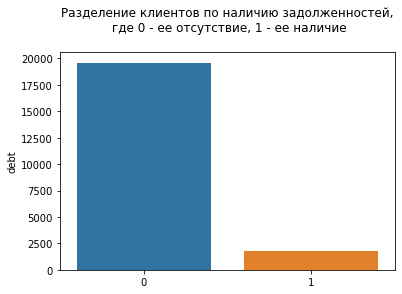

In [24]:
# Сортируем датасет и выводим количество клиентов без задолженностей и с задолженностями

data = data.sort_values(by = 'debt')
seaborn.barplot(x = data['debt'].unique(), y = data['debt'].value_counts())
plt.title('Разделение клиентов по наличию задолженностей,\n где 0 - ее отсутствие, 1 - ее наличие\n')

In [25]:
# Узнаем возможное количество детей в датасете, сортируем его по возрастанию

data = data.sort_values(by = 'children')
print(data['children'].unique())

[0 1 2 3 4 5]


In [26]:
# Выводим распределение по отсутствию задолженности и количеству детей

no_debt_child = [] # список вернет кол-во клиентов без задолженности по категориям кол-ва детей
for a in data['children'].unique():
    data_sorted = data.loc[(data['children'] == a) & (data['debt'] == 0)]
    no_debt_child.append(data_sorted['debt'].count())
    
print(no_debt_child)

[13028, 4364, 1858, 303, 37, 9]


In [29]:
# Выводим распределение по наличию задолженности и количеству детей

is_debt_child = [] # список вернет кол-во клиентов с задолженностью по категориям кол-ва детей
for a in data['children'].unique():
    data_sorted = data.loc[(data['children'] == a) & (data['debt'] == 1)]
    is_debt_child.append(data_sorted['debt'].count())
    
print(is_debt_child)    

[1063, 444, 194, 27, 4, 0]


<AxesSubplot:title={'center':'Распределение кол-ва клиентов по показателю задолженности в зависимости от кол-ва детей\n'}, xlabel='Кол-во детей'>

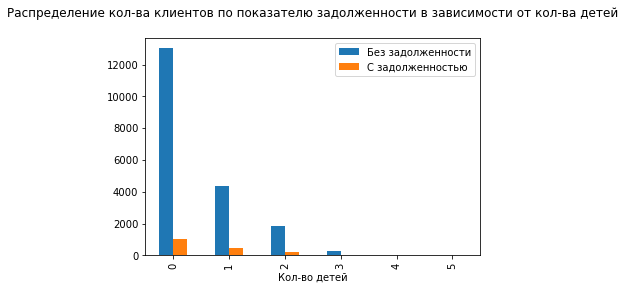

In [35]:
# Создаем датафрейм для вывода сравнительной диаграммы

d = {'Без задолженности': no_debt_child, 'С задолженностью':is_debt_child}
df = pd.DataFrame(data = d)

# Строим график
df.plot(title='Распределение кол-ва клиентов по показателю задолженности в зависимости от кол-ва детей\n', \
        kind='bar', xlabel='Кол-во детей')

<div class="alert alert-info">

Для наглядности и вывода корреляции (как процента клиентов, не возвращающих кредит в срок) построим сводную таблицу

In [37]:
# Выведем функцию для построения сводной таблицы

def pivot(data1, row1, row2):
    data1_pivot = pd.pivot_table(data1, index = row1, aggfunc = {row2:['count', 'sum', 'mean']})
    data1_pivot.columns = ['Всего кредитополучателей', 'Доля должников', 'Количество должников']
    display(data1_pivot)

In [44]:
# Используем функцию 

pivot(data, 'children', 'debt')

,Всего кредитополучателей,Доля должников,Количество должников
children,,,
0,14091,0.075438,1063
1,4808,0.092346,444
2,2052,0.094542,194
3,330,0.081818,27
4,41,0.097561,4
5,9,0.000000,0


<div class="alert alert-info">

Посмотрим корреляцию для клиентов с детьми и без детей

In [72]:
# Клиенты без детей

no_debt_no_child = 0 # клиенты без задолженности
data_sorted = data.loc[(data['children'] == 0) & (data['debt'] == 0)]
no_debt_no_child += data_sorted['debt'].count()
    
is_debt_no_child = 0 # клиенты с задоженностью
data_sorted = data.loc[(data['children'] == 0) & (data['debt'] == 1)]
is_debt_no_child += data_sorted['debt'].count()

print(no_debt_no_child)
print(is_debt_no_child)

no_child_ratio = is_debt_no_child / (no_debt_no_child+is_debt_no_child) * 100 # корреляция
print(no_child_ratio) # корреляция

13028
1063
7.543822297920659


In [73]:
# Клиенты с детьми

no_debt_is_child = 0 # клиенты без задолженности
for a in data['children'].unique():
    data_sorted = data.loc[(data['children'] == a) & (data['children'] != 0) & (data['debt'] == 0)]
    no_debt_is_child += data_sorted['debt'].count() 

is_debt_is_child = 0 # клиенты с задолженностью 
for a in data['children'].unique():
    data_sorted = data.loc[(data['children'] == a) & (data['children'] != 0) & (data['debt'] == 1)]
    is_debt_is_child += data_sorted['debt'].count()

print(no_debt_is_child)
print(is_debt_is_child)

is_child_ratio = is_debt_is_child / (no_debt_is_child + is_debt_is_child) * 100 # корреляция
    
print(is_child_ratio)

6571
669
9.240331491712707


In [85]:
d = ({'Дети': ['нет','есть'],\
      'Всего кредитополучателей': [(no_debt_no_child+is_debt_no_child), (no_debt_is_child + is_debt_is_child)],\
      'Доля должников' : [no_child_ratio, is_child_ratio], \
      'Количество должников' : [is_debt_no_child, is_debt_is_child]
     })
df = pd.DataFrame(data=d)
display(df)

,Дети,Всего кредитополучателей,Доля должников,Количество должников
0,нет,14091,7.543822,1063
1,есть,7240,9.240331,669


<div class="alert alert-success" role="alert">
    
 - Количество клиентов без детей в данной выборке в 2 раза выше, чем клиентов, у которых есть дети.
 
 - При выводе шанса невозвращения кредита в зависимости от количества детей средний шанс для всех групп составляет около 8%; При этом 0% для клиентов с 5 детьми, однако их общее количество составляет всего 9 человек, поэтому этим можно пренебречь. 
 
 - Шансы того, что клиент не вернет вовремя кредит, если у него нет детей - 7.5%
 - Шансы того, что клиент не вернет вовремя кредит, если у него есть дети - 9.2%
 
 - Таким образом, нельзя сделать вывод, что наличие и количество детей у клиентов сущесвенно влияет на возврат кредита; однако клиенты с детьми с большей долей вероятности могут не вернуть его в срок.

### Зависимость между семейным положением и возвратом кредита в срок

In [115]:
# Найдем зависимость между семейным статусом и его id

data_family = data[['family_status','family_status_id']].value_counts(ascending=False)
display(data_family)

family_status          family_status_id
женат / замужем        0                   12261
гражданский брак       1                    4134
Не женат / не замужем  4                    2796
в разводе              3                    1189
вдовец / вдова         2                     951
dtype: int64

<AxesSubplot:title={'center':'Распределение кол-ва клиентов по семейному положению\n'}, xlabel='family_status,family_status_id'>

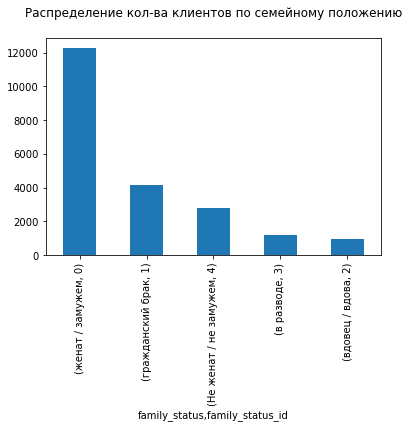

In [122]:
# Построим диаграмму

data_family.plot(title = 'Распределение кол-ва клиентов по семейному положению\n', kind='bar')

In [125]:
# Выведем сводную таблицу
pivot(data, 'family_status_id', 'debt')

,Всего кредитополучателей,Доля должников,Количество должников
family_status_id,,,
0,12261,0.075606,927
1,4134,0.093130,385
2,951,0.066246,63
3,1189,0.070648,84
4,2796,0.097639,273


<div class="alert alert-info">
    
    '0':'женат / замужем',
    '1':'гражданский брак',
    '2':'вдовец / вдова',
    '3':'в разводе',
    '4':'Не женат / не замужем'

<div class="alert alert-success" role="alert">
    
 - По полученным данным видно, что клиенты, имеющие семейное положение 'не женат\не замужем' имеют самый высокий шанс не вернуть кредит.
 - Второе место по самой высокой вероятности не вернуть вовремя кредит занимают клиенты с семейным статусом 'гражданский брак'.
 - 'Вдовцы\вдовы' реже всего опаздывают с выплатой кредита, однако группа самая малочисленная, так что делать по ней выводы достаточно сложно
 - Самая многочисленная группа -'женат / замужем' имеет риск не вернуть кредит чуть ниже среднего.
    
 - Общий шанс невыплаты кредита в срок по семейному положению составляет около 8%

### Зависимость между уровнем дохода и возвратом кредита в срок

<div class="alert alert-info">

Напомним диапозон дохода:  
    
 - 0–30000 — 'E';
 - 30001–50000 — 'D';
 - 50001–200000 — 'C';
 - 200001–1000000 — 'B';
 - 1000001 и выше — 'A'.

In [127]:
# Выведем список возможных катеторий по убыванию дохода
data = data.sort_values(by = 'total_income_category')
print(data['total_income_category'].unique())

['A' 'B' 'C' 'D' 'E']


In [128]:
# Посмотрим распределение клиентов по уровню дохода

client_income = [] # список вернет кол-во клиентов по уровню дохода
for t in data['total_income_category'].unique():
    data_sorted = data.loc[data['total_income_category'] == t, 'total_income_category'].count()
    client_income.append(data_sorted)
    
print(client_income)    

[25, 5014, 15921, 349, 22]


Text(0.5, 1.0, 'Распределение уровня дохода по клиентам\n')

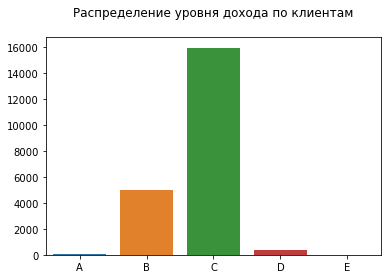

In [129]:
seaborn.barplot(x = data['total_income_category'].unique(), y = client_income)
plt.title('Распределение уровня дохода по клиентам\n')

<div class="alert alert-info"> 
 
 - Большинство клиентов имеют средний достаток

In [131]:
# Выведем сводную таблицу
pivot(data, 'total_income_category', 'debt')

,Всего кредитополучателей,Доля должников,Количество должников
total_income_category,,,
A,25,0.080000,2
B,5014,0.070602,354
C,15921,0.084982,1353
D,349,0.060172,21
E,22,0.090909,2


<div class="alert alert-success" role="alert">

 - Общая вероятность не вернуть кредит в срок у клиентов по уровню дохода составляет 8%
 - Клиенты с средним доходом имеют достаточно шанс не вернуть кредит в срок выше среднего - 8.4%, 
   при этом их доля среди кредитозаемщиков самая высокая.
 - Клиенты с уровнем дохода B являются достаточно надежежными кредитозаемщиками - они вернут кредит с вероятностью 93%.
 - Несмотря на то, что клиенты с самым низким доходом имеют самую высокую вероятность не вернуть кредит в срок - 9%, их доля в общем числе клиентов самая низкая (всего 22 человека), поэтому делать выводы по ним нецелесообразно.
 - Самыми надежными, но малочисленными кредитозаемщиками являются клиенты с уровнем дохода D - 94%.


### Зависимость цели кредита и его возврата в срок

In [ ]:
# Выведем возможные цели кредита

print(data['purpose_category'].unique())

In [133]:
# Выведем количество клиентов по целям кредита

client_purpose = [] # список вернет кол-во клиентов по целям кредита
for p in data['purpose_category'].unique():
    data_sorted = data.loc[data['purpose_category'] == p, 'purpose_category'].count()
    client_purpose.append(data_sorted)
    
print(client_purpose)    

[10751, 3988, 4279, 2313]


Text(0.5, 1.0, 'Распределение целей кредита\n')

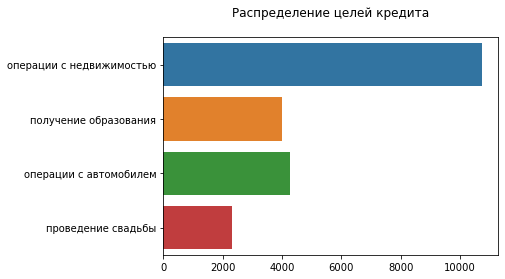

In [134]:
# Посторим диаграмму

seaborn.barplot(x = client_purpose, y = data['purpose_category'].unique())
plt.title('Распределение целей кредита\n')

In [135]:
# Выведем сводную таблицу
pivot(data, 'purpose_category', 'debt')

,Всего кредитополучателей,Доля должников,Количество должников
purpose_category,,,
операции с автомобилем,4279,0.093480,400
операции с недвижимостью,10751,0.072551,780
получение образования,3988,0.092528,369
проведение свадьбы,2313,0.079118,183


<div class="alert alert-success" role="alert">

 - Общая доля вероятности, что клиенты не вернут кредит в срок по целям кредита - 8%
 - Самыми рискованными целями кредита для кредитора является получение образования и операции с автомобилем - 9%

# Итоги

<div class="alert alert-danger" role="alert">

 -  Учтем, что что общая вероятность не вернуть кредит вовремя по всем категориям составляет 8%.
  
**Количество детей**
 - Клиенты с детьми являются более рисованными кредитозаемщиками, чем клиенты без детей (9% против 7%), при этом клиентов без детей в выборке в 2 раза больше.
    
**Семейное положение**
 - По семейному положению самыми рискованными кредитозаемщиками являются люди, состоящие в гражданском браке и холостые.

**Доходы**       
 - Самыми многочисленными категориями клиентов по уровню доходов являются клиенты с уровнем дохода B и C.
 - Клиенты с уровнем дохода 50-200 тыс. (категория C) составляют самую многочисленную группу, у которой риск невозврата превышает средний всего на 0,3%.
 - Клиенты с уровнем дохода 200 тыс.–1 млн. (категория В) имеют более низкий риск невозврата - 7%.
 - Категории B и C занимают почти 98% от всех категорий. Поэтому сделать точные выводы по оставшимся 2% невозможно. Однако категория B составит в данной выборке самых надежных кредитозаемщиков.

**Цели**    
 - Хотелось бы выделить еще одну достаточно многочисленную категорию - клиенты, берущие кредит на операции с недвижимостью. У них вероятность невозврата составляет 7,2%, при том, что доля таких клиентов в выборке - 50%.
    
      
**Итог**    
 - Возможно, стоит проверить выборку клиентов категории B, без детей, берущих кредит на недвижимость - данная группа вполне может стать самой надежной для кредитора.